In [1]:
import pandas as pd

In [2]:
from sklearn.preprocessing import OneHotEncoder

In [3]:
from sklearn.compose import ColumnTransformer

In [4]:
df = pd.read_csv('/content/StudentsPerformance.csv')

In [5]:
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
numerical_cols = ['reading score', 'writing score']

In [7]:
column_transformer = ColumnTransformer(transformers=[('cat', OneHotEncoder(drop='first'), categorical_cols)],
    remainder='passthrough')


In [8]:
X = column_transformer.fit_transform(df[categorical_cols + numerical_cols])
y = df['math score']

In [9]:
encoded_feature_names = column_transformer.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_feature_names = list(encoded_feature_names) + numerical_cols

In [10]:
X_df = pd.DataFrame(X, columns=all_feature_names)

In [11]:
import matplotlib.pyplot as plt

In [12]:
import seaborn as sns

In [13]:
X_df['math score'] = y

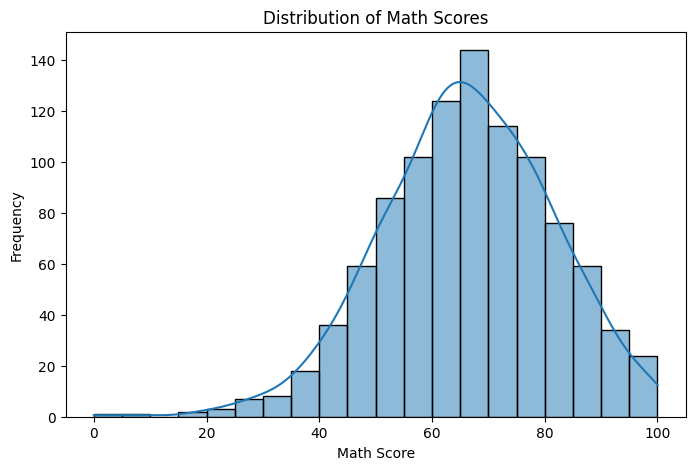

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(X_df['math score'], bins=20, kde=True)
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.show()

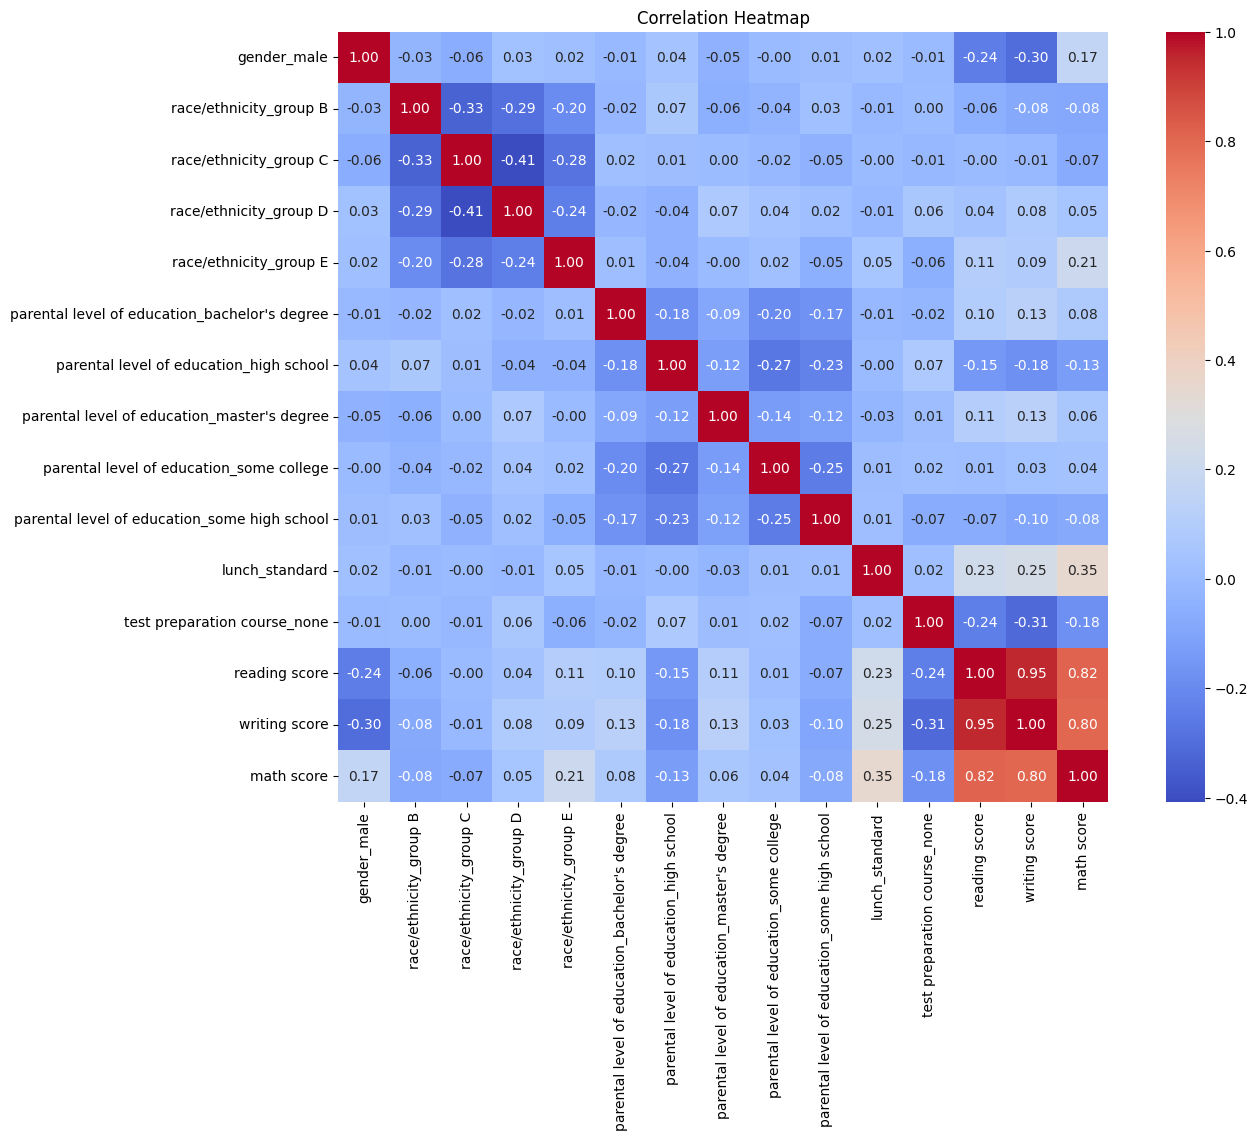

In [15]:
plt.figure(figsize=(15, 10))
corr_matrix = X_df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_df.drop('math score', axis=1), y, test_size=0.2, random_state=42)

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test)

In [20]:
coeff_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})
important = coeff_df[coeff_df['Feature'].str.contains('test preparation course|parental level of education')]
print(important)

                                          Feature  Coefficient
5   parental level of education_bachelor's degree    -0.716901
6         parental level of education_high school     0.929312
7     parental level of education_master's degree    -1.400489
8        parental level of education_some college     0.998856
9    parental level of education_some high school     0.756470
11                   test preparation course_none     3.289642


In [21]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np


In [22]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


In [23]:
print(f"R² Score: {r2:.2f}")

R² Score: 0.88


In [24]:
print(f"Mean Absolute Error: {mae:.2f}")

Mean Absolute Error: 4.21


In [25]:
print(f"Root Mean Squared Error: {rmse:.2f}")

Root Mean Squared Error: 5.39


In [31]:
for gender in df['gender'].unique():
    print(f"\nGender: {gender}")
    df_gender = df[df['gender'] == gender]


Gender: female
  Shape of X for female: (518, 13)
  Shape of y for female: (518,)
  Feature names for female: ['race/ethnicity_group B', 'race/ethnicity_group C', 'race/ethnicity_group D', 'race/ethnicity_group E', "parental level of education_bachelor's degree"]...

Gender: male
  Shape of X for male: (482, 13)
  Shape of y for male: (482,)
  Feature names for male: ['race/ethnicity_group B', 'race/ethnicity_group C', 'race/ethnicity_group D', 'race/ethnicity_group E', "parental level of education_bachelor's degree"]...


In [30]:
    x_gender = column_transformer.fit_transform(df_gender[categorical_cols + numerical_cols])
    y_gender = df_gender['math score']
    feature_names = list(column_transformer.named_transformers_['cat'].get_feature_names_out(categorical_cols)) + numerical_cols

In [36]:
x_train_g, x_test_g, y_train_g, y_test_g = train_test_split(x_gender, y_gender, test_size=0.2, random_state=42)

In [39]:
    model_gender = LinearRegression()
    model_gender.fit(x_train_g, y_train_g)
    y_pred_g = model_gender.predict(x_test_g)

In [41]:
    r2_g = r2_score(y_test_g, y_pred_g)
    mae_g = mean_absolute_error(y_test_g, y_pred_g)
    rmse_g = np.sqrt(mean_squared_error(y_test_g, y_pred_g))

In [42]:
print(f"R² Score: {r2_g:.2f}")

R² Score: 0.85


In [43]:
print(f"MAE: {mae_g:.2f}")

MAE: 4.54


In [44]:
print(f"RMSE: {rmse_g:.2f}")

RMSE: 5.42
